## Multi-class Classification

<img src="./images/multiclass_classification/multiclass_example.png" style=" width: 60% ">

Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. We will use softmax activation function to solve multiclass classification

## Softmax Function

In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector **z** is generated by a linear function which is applied to a softmax function. The softmax function converts **z** into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs will correspond to larger output probabilities.

<img src="./images/multiclass_classification/softmax_function.png" style=" width: 60% ">

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$

The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:

\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(suppress = True)

In [2]:
def softmax_function(z):
    """
    Compute softmax i.e. probability of each item in z
    """
    e_z = np.exp(z)
    a = e_z / np.sum(e_z)
    return a

In [3]:
temp_z = np.array([1, 2, 3, 4, 5])
sft_z = softmax_function(temp_z)

Text(0.5, 1.0, 'Softmax function')

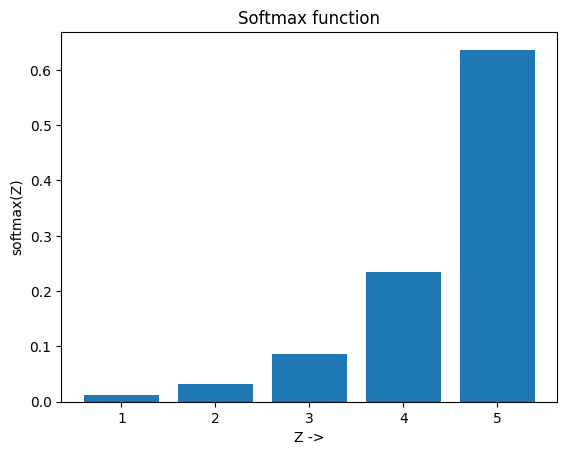

In [4]:
plt.bar(temp_z, sft_z)
plt.xlabel("Z ->")
plt.ylabel("softmax(Z)")
plt.title("Softmax function")

### Loss & Cost function of softmax

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.

Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] 
\end{align}

In neural network, the loss can be calculated using the below mentioned loss functions

#### SparseCategorialCrossentropy or CategoricalCrossEntropy

Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- `SparseCategorialCrossentropy`: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- `CategoricalCrossEntropy`: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].

### Direct implementation in tensforflow (Not preferred)

In [5]:
from sklearn.datasets import make_blobs
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
m = 200
X, y = make_blobs(n_samples=m, centers=centers, cluster_std=1.0,random_state=30)


In [6]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(X,y,epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 1.4885
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.3561
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2423
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 1.1393
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 1.0449
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.9611
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8847
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.8123
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7435
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6785


In [7]:
y_pred_prob = model.predict(X)
y1 = np.zeros(m)
for i in range(m):
    y1[i] = np.argmax(softmax_function(y_pred_prob[i]))

7/7 [==============================] - 0s 998us/step


### Preferred implementation in tensorflow

In the preferred implementation, the last layer is implemented with linear activation and then the output activation is passed through softmax to get the output probabilities as shown below. Also the loss function is passed with an extra argument i.e. `from_logits = True`

In [8]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(X,y,epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 2.0471
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 1.8333
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 1.6700
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 1.5342
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 1.4180
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 1.3199
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 1.2258
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 1.1450
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 1.0699
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 1.0022


In [9]:
y_pred_preferred = preferred_model.predict(X)
y2 = np.zeros(m)
for i in range(m):
    y2[i] = np.argmax(softmax_function(y_pred_preferred[i]))

7/7 [==============================] - 0s 899us/step


In [10]:
"""
Tensorflow Softmax function
"""
tf_sftmax = tf.nn.softmax(y_pred_preferred).numpy()

Text(0.5, 1.0, 'Preferred implementation')

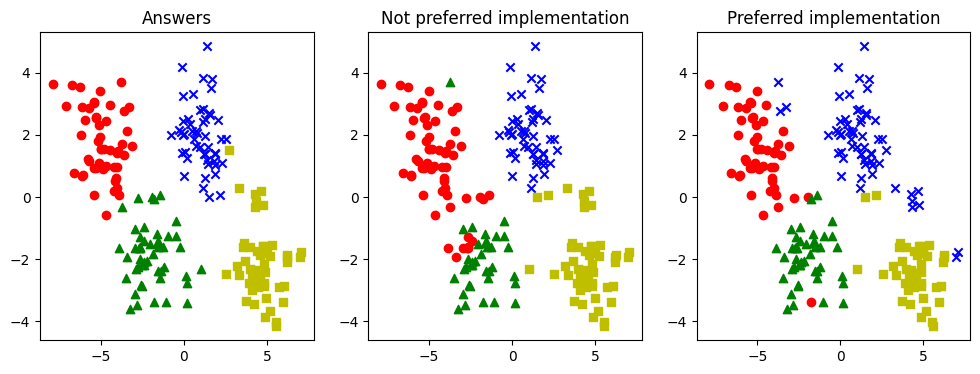

In [11]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].scatter(X[y == 0, 0], X[y == 0, 1], color='r', marker='o')
ax[0].scatter(X[y == 1, 0], X[y == 1, 1], color='g', marker='^')
ax[0].scatter(X[y == 2, 0], X[y == 2, 1], color='b', marker='x')
ax[0].scatter(X[y == 3, 0], X[y == 3, 1], color='y', marker='s')
ax[0].set_title("Answers")

ax[1].scatter(X[y1 == 0, 0], X[y1 == 0, 1], color='r', marker='o')
ax[1].scatter(X[y1 == 1, 0], X[y1 == 1, 1], color='g', marker='^')
ax[1].scatter(X[y1 == 2, 0], X[y1 == 2, 1], color='b', marker='x')
ax[1].scatter(X[y1 == 3, 0], X[y1 == 3, 1], color='y', marker='s')
ax[1].set_title("Not preferred implementation")

ax[2].scatter(X[y2 == 0, 0], X[y2 == 0, 1], color='r', marker='o')
ax[2].scatter(X[y2 == 1, 0], X[y2 == 1, 1], color='g', marker='^')
ax[2].scatter(X[y2 == 2, 0], X[y2 == 2, 1], color='b', marker='x')
ax[2].scatter(X[y2 == 3, 0], X[y2 == 3, 1], color='y', marker='s')
ax[2].set_title("Preferred implementation")